# K-means Clustering

This is an unsupervised algorithm which is used when we have unlabelled data. The goal of this algorithm is to find groups in data.
### Mathematically, this algorithm separates n points into k groups, where k<=n.
First, a set of k random points are chosen as centroids. Now , rest of the points are assigned to closest cluster centroid.Then again, centroid of newly formed cluster is found and whole process is repeated. This keeps on repeating until centroid of newly formed clusters is same OR maxiumum number of iterations reached OR points don't change in cluster.

## Author:
Rajat Kumar

Data Science Intern

The Sparks Foundation

## Problem Statement:
### Task 3
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. Dataset:https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns= iris.feature_names )
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# DATA VISUALIZATION

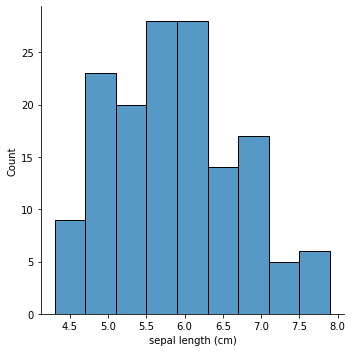

In [6]:
sns.displot(iris_df["sepal length (cm)"])

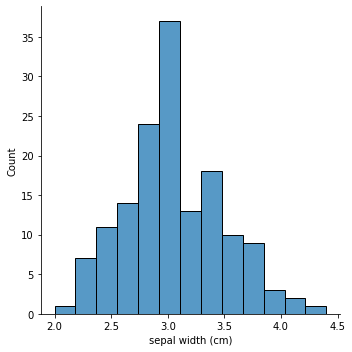

In [7]:
sns.displot(iris_df["sepal width (cm)"])

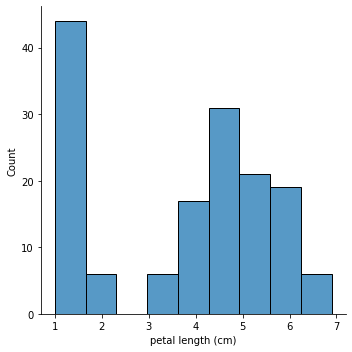

In [8]:
sns.displot(iris_df["petal length (cm)"])

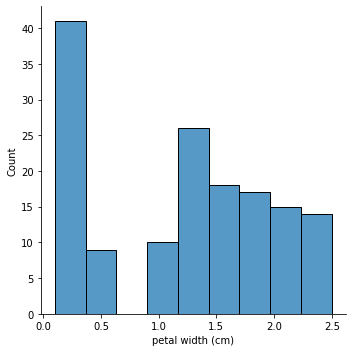

In [9]:
sns.displot(iris_df["petal width (cm)"])

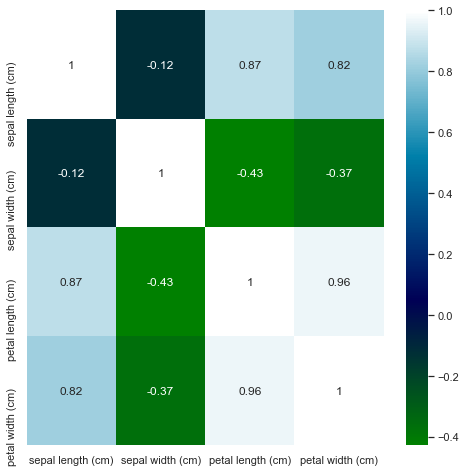

In [10]:
sns.set()
plt.figure(figsize = (8, 8))
sns.heatmap(iris_df.corr(), annot = True, cmap = 'ocean');

# DATA PREPARATION 

In [11]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
inertia_values = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    inertia_values.append(kmeans.inertia_)

In [12]:
kmeans

KMeans(n_clusters=9, random_state=0)

# Optimal number of clusters


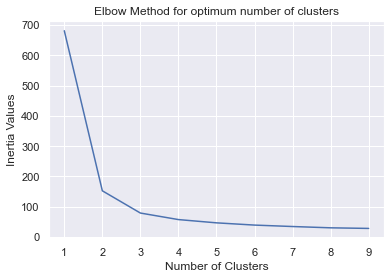

In [13]:
plt.plot(range(1,10),inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Values')
plt.title('Elbow Method for optimum number of clusters')
plt.show()

# Cluster Visualization

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [15]:
print(kmeans.cluster_centers_)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


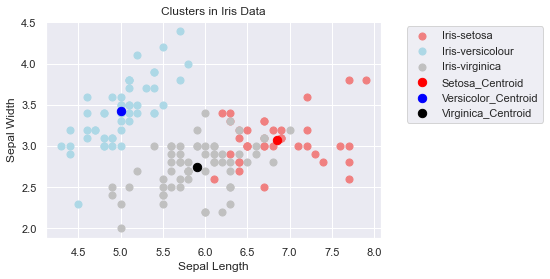

In [16]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'lightcoral', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'lightblue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 50, c = 'silver', label = 'Iris-virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Clusters in Iris Data')
plt.scatter(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[0,1],label ='Setosa_Centroid',c='red',s=70 )
plt.scatter(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1],label ='Versicolor_Centroid',c='Blue',s=70 )
plt.scatter(kmeans.cluster_centers_[2,0],kmeans.cluster_centers_[2,1],label ='Virginica_Centroid',c='black',s=70 )
plt.legend(loc='upper right',bbox_to_anchor=(1.5, 1))
plt.show()